Load data untraditional way, connect to DB example

In [1]:
# from connect import Connect
# from pymongo import MongoClient

# class Connect(object):
#     @staticmethod    
#     def get_connection():
#         return MongoClient("mongodb://$[username]:$[password]@$[hostlist]/$[database]?authSource=$[authSource]")

# connection = Connect.get_connection()
# cursor = db.inventory.find({})
# for inventory in cursor:
#      pprint(inventory)

Example of powerful viz package.

In [2]:
# # example of data shader use. It may be useful because of speed and visualization style.
# # https://datashader.org/
# import datashader as ds
# import datashader.transfer_functions as tf
# cvs = ds.Canvas(plot_width=400, plot_height=400)
# agg = cvs.points(df, 'X', 'Y')
# img = tf.shade(agg, cmap=['lightblue', 'darkblue'], how='eq_hist')

_Usefull links_

In [3]:
# https://github.com/CityOfDetroit/midas-2020
# https://drive.google.com/file/d/1W59wB0HQF6piCo1KIf9IBPkoEbiqGWg_/view

# https://www.metrotimes.com/news-hits/archives/2018/03/06/this-interactive-map-allows-you-to-see-every-single-reported-crime-in-detroit
# https://spotcrime.com/mi/detroit

# # predictive analitics for police
# https://www.predpol.com/law-enforcement/#predPolicing

# https://www.metrotimes.com/news-hits/archives/2018/03/06/this-interactive-map-allows-you-to-see-every-single-reported-crime-in-detroit
# https://spotcrime.com/mi/detroit

# #d detroit crimes viewer
# https://cityofdetroit.github.io/crime-viewer/

# !!!! Classification of offences

# https://www.atlantapd.org/i-want-to/crime-data-downloads
# https://www.atlantapd.org/Home/ShowDocument?id=220
# https://www.atlantapd.org/Home/ShowDocument?id=2881

# https://www.policefoundation.org/wp-content/uploads/2016/12/CMAN-Issue-5.pdf
# https://www.policefoundation.org/publication/5-things-on-analyzing-police-traffic-stop-data/
# https://www.policedatainitiative.org/wp-content/uploads/2017/10/5Things_PDI_9-29-17_final.pdf

## Preprocessing
_Load, process, save_

In [2]:
# initialise packages and meta-constants in a notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
PATH_TO_DATA = 'data\\'
PATH_TO_IMAGES = 'img\\'

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load Data Traditional way

In [3]:
df = pd.read_csv('RMS_Crime_Incidents (2).csv')
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,...,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
0,-83.045744,42.337435,3057974,1705020116,Brush St & Madison St,INTIMIDATION / STALKING,ASSAULT,1303,13003,INTIMIDATION / STALKING,...,2017,0312,03,261635172002033,Downtown,5,48226,-83.045744,42.337435,26994990
1,-83.152200,42.441119,3018981,1701280248,Chippewa St & Greenlawn St,ARSON,BURGLARY,2201,22001,BURGLARY - FORCED ENTRY,...,2017,1203,12,261635390002005,Garden Homes,2,48221,-83.152200,42.441119,26994991
2,-83.143470,42.334414,3251044,1808150108,McGraw St & Lumley St,LARCENY - OTHER,LARCENY,2307,23007,LARCENY - OTHER,...,2018,0401,04,261635262001012,Claytown,6,48210,-83.143470,42.334414,26994992
3,-83.013835,42.346181,3393605,1908050159,E Lafayette St & Leib St,LARCENY - OTHER,LARCENY,2307,23007,LARCENY - OTHER,...,2019,0710,07,261635166002001,Elmwood Park,5,48207,-83.013835,42.346181,26994993
4,-83.156023,42.445779,3004324,1612200136,8 Mile Rd & Cherrylawn St,FRAUD BY WIRE,FRAUD,2605,26005,FRAUD BY WIRE,...,2016,1203,12,261635390003002,Garden Homes,2,48221,-83.156023,42.445779,26994994


In [4]:
df.columns

Index(['X', 'Y', 'crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'incident_time',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'oid'],
      dtype='object')

In [5]:
df.loc[0]

X                                      -83.0457
Y                                       42.3374
crime_id                                3057974
report_number                        1705020116
address                   Brush St & Madison St
offense_description     INTIMIDATION / STALKING
offense_category                        ASSAULT
state_offense_code                         1303
arrest_charge                             13003
charge_description      INTIMIDATION / STALKING
incident_timestamp     2017-05-02T18:00:00.000Z
incident_time                             14:00
day_of_week                                   2
hour_of_day                                  14
year                                       2017
scout_car_area                             0312
precinct                                     03
block_id                        261635172002033
neighborhood                           Downtown
council_district                              5
zip_code                                

Let'e evaluate whole dataset amount of observation time distribution

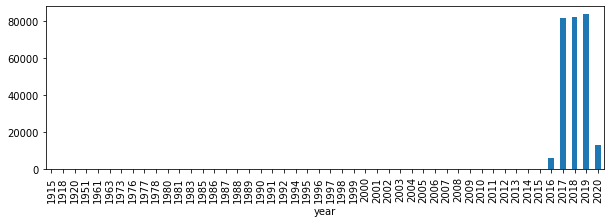

In [6]:
df.groupby('year').crime_id.count().plot.bar(figsize=(10, 3))

Let's cut old years. becouse there are few observation before 2016-2017, will evaluate only 2016+ peridon now.

In [7]:
# df.loc[15:19].to_json()

In [8]:
df = df[df.year >= 2016]

There are few **classifications of crimes** exist. Let's take on and additionally label our data by it -- National Incident-Based Reporting System (NIBRS) user manual:
```
ucr-2019-1-nibrs-user-manual.pdf -> 
        * https://www.atlantapd.org/Home/ShowDocument?id=2881 
        * https://www.fbi.gov/file-repository/ucr/ucr-2019-1-nibrs-user-manual.pdf/view
```

Ovaral, the classification structure is/consist of **three** types:
    * Offences against person
    * Offences against society
    * Offences against property

In [9]:
cats = df.offense_category.unique()
cats

array(['ASSAULT', 'BURGLARY', 'LARCENY', 'FRAUD', 'STOLEN VEHICLE',
       'RUNAWAY', 'OTHER', 'ROBBERY', 'ARSON', 'SEX OFFENSES',
       'OBSTRUCTING JUDICIARY', 'HOMICIDE', 'JUSTIFIABLE HOMICIDE',
       'KIDNAPPING', 'SEXUAL ASSAULT', 'AGGRAVATED ASSAULT', 'OUIL',
       'STOLEN PROPERTY', 'DAMAGE TO PROPERTY', 'DANGEROUS DRUGS',
       'FAMILY OFFENSE', 'GAMBLING', 'LIQUOR', 'WEAPONS OFFENSES',
       'DISORDERLY CONDUCT', 'MISCELLANEOUS', 'SOLICITATION', 'EXTORTION',
       'FORGERY', 'OBSTRUCTING THE POLICE'], dtype=object)

Pick the relative dataframe indexes of offenes by our classification (type/category):

In [10]:
index_to_society = df.offense_category[df.offense_category.isin(\
        ['DANGEROUS DRUG', 'GAMBLING', 'WEAPONS OFFENSES'])].index

index_to_person = df.offense_category[df.offense_category.isin(\
        ['SEX OFFENSES', 'SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ASSAULT', 'AGGRAVATED ASSAULT'])].index

index_to_property = df.offense_category[df.offense_category.isin(\
        ['ARSON', 'LARCENY', 'BURGLARY', 'STOLEN VEHICLE', 'FRAUD', 
         'DAMAGE TO PROPERTY', 'STOLEN PROPERTY', 'ROBBERY', 'EXTORTION', 'FORGERY'])].index

# The list of others/non crimes
# OUIL, MISCELLANEOUS, OBSTRUCTING THE POLICE, JUSTIFIABLE HOMICIDE, FAMILY OFFENSE, 
# LIQUOR, DISORDERLY CONDUCT, OBSTRUCTING JUDICIARY

In [11]:
df['Crime Against'] = 'Another'
df.loc[index_to_society, 'Crime Against'] = 'Society'
df.loc[index_to_person, 'Crime Against'] = 'Person'
df.loc[index_to_property, 'Crime Against'] = 'Property'

Also, let's preprocess timestamps of a data. This is not documented, but we need to convert the timezone also

In [12]:
df['incident_timestamp_dt'] = pd.to_datetime(df['incident_timestamp']).dt.tz_convert('America/Detroit')
df['incident_timestamp_dt_month'] = df['incident_timestamp_dt'].dt.month
df['incident_timestamp_dt_hour'] = df['incident_timestamp_dt'].dt.hour
df['incident_timestamp_dt_day_of_week'] = df['incident_timestamp_dt'].dt.dayofweek
df['incident_timestamp_dt_day_of_month'] = df['incident_timestamp_dt'].dt.day

Now let's save out preprocessed data (generally, then will load it to database)

In [13]:
# memory usage of each column in bytes
memory_usege = df.memory_usage().sum() / (1024 * 1024)
print('App. file size if: {0} MB; shape is {1}, rows*cols;'.format(memory_usege.round(2), df.shape))
del memory_usege

App. file size if: 73.01 MB; shape is (266420, 30), rows*cols;


In [14]:
df.to_csv(PATH_TO_DATA + 'RMS_Crime_Incidents2016_modified.csv')

## Make dataviz
_Let's plot some auxilary statistics plots, which will be applied to general insights._

Some interesting insights:

**SEX related**:
* Prostitution is active on Wednesday, Friday and Tuesday (in order of increasing), in the evening at night, while another week is Criminal Sexual Conduct 2nd and 4th degree. There are up to 3 most active prostitution related offences adressed.
    * Wednesday is a day of Oral/Anal Criminal Sexual Conducts and Penis/Vagina Criminal Sexual Conducts day is Saturday.
    * East part is strangely related to sex-related offenses.

**General**:
* Car thefts are active the whole week

`df[(df.offense_description.str.contains('PROSTITUT'))].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
`df[df.offense_category.str.contains('SEX OFFENSES')].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
`df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['X', 'Y']).count().crime_id.sort_values()`
`df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['address']).count().crime_id.sort_values()

Overall offense number per different times:
* Per month of a year
* Per day of a month
* Per day of a week
* Per hour of a day

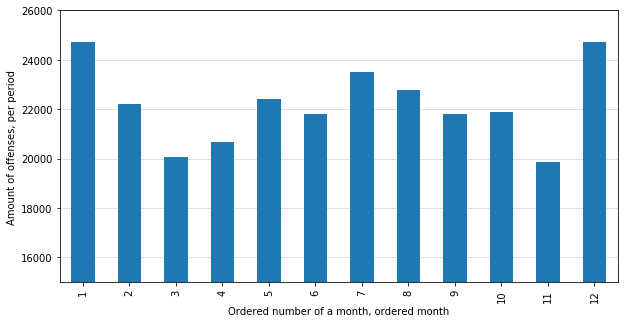

In [15]:
df.groupby('incident_timestamp_dt_month').crime_id.count().plot.bar(ylim=(15000,26000), zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Ordered number of a month, ordered month')
plt.ylabel('Amount of offenses, per period')
plt.grid(alpha=0.5, axis='y', zorder=-1)
plt.savefig('overall_per_month_detroit_time.png', dip=400)

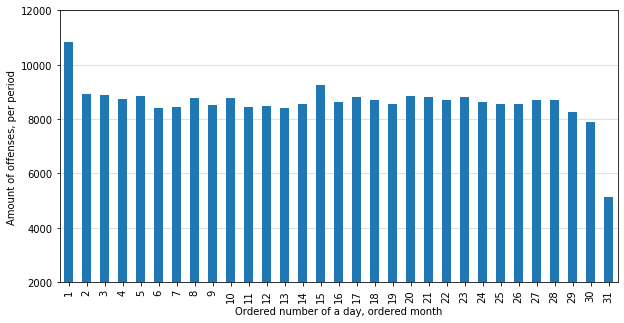

In [16]:
df.groupby('incident_timestamp_dt_day_of_month').crime_id.count().plot.bar(ylim=(2000,12000), zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Ordered number of a day, ordered month')
plt.ylabel('Amount of offenses, per period')
plt.grid(alpha=0.5, axis='y', zorder=-1)
#plt.savefig('overall_per_day_of_month_detroit_time.png', dip=400)

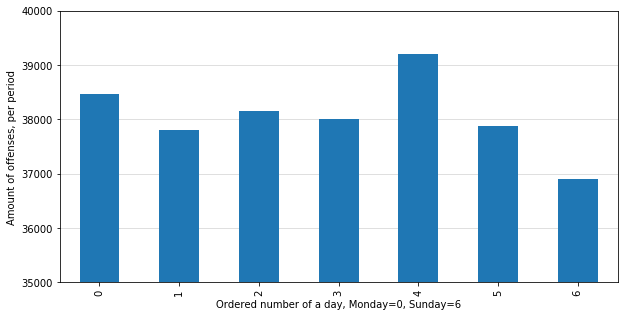

In [17]:
df.groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar(ylim=(35000,40000), zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Ordered number of a day, Monday=0, Sunday=6')
plt.ylabel('Amount of offenses, per period')
plt.grid(alpha=0.5, axis='y', zorder=-1)
plt.savefig('overall_per_weekday_detroit_time.png', dip=400)

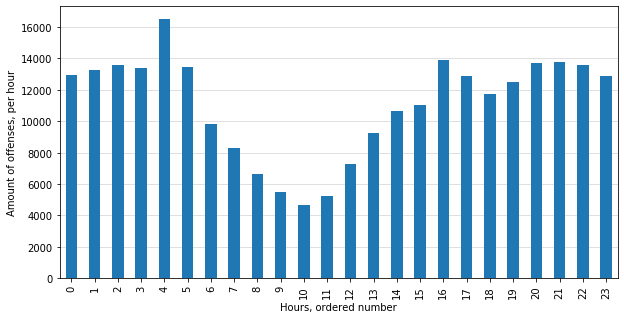

In [18]:
df.groupby(['incident_timestamp_dt_hour']).crime_id.count().plot.bar(zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Hours, ordered number')
plt.ylabel('Amount of offenses, per hour')
plt.grid(alpha=0.5, axis='y', zorder=-1)
plt.savefig('overall_per_hour_detroit_time.png', dip=400)

# PRESENTATION

### What is the Problem to solve?
* Community policing **progressivists want&try to advance policing** [\[1\]](https://www.policedatainitiative.org/about/). -> INITIO BY "THE POLICE FOUNDATION" & "THE POLICE DATA INITIATIVE". 

But less than half major police departments participate now.

***
### Why to solve it?
	
* To **increase** the transparency of public safety-related policy-making & budget planning via data analysis. Minor: To make a public audit of FBI reports.
* To **reveal** important public data & to inform tourists and locals about the safety of a city part and outcomes of taxation.
* To **support** initiative of progressive police departments via science, technology and innovation.

*** 
### What is the Data?

`SOURCES -> “Police Data Initiative” https://www.policedatainitiative.org/datasets/incidents/`

`STRUCTURE EXAMPLE:`
<img src="https://i.imgur.com/FmssEbN.png" alt="Pipeline" height="80%" width="80%">

***
### What is the Pipeline?

<img src="https://i.imgur.com/HD8ek3s.png" alt="Pipeline" height="40%" width="70%">

```
    1. LOAD RAW INPUT FORMAT (MVP example of data required): TIMESTAMP, ADDRESS (name of geocoord), OFFENCE_DATA (category)
        1.1 ADD RAW DATA -> MongoDB
	
    2. PROCESS RAW DATA (MVP example of output): YEAR MONTH DAY TIME, longitude, latitude, Classification of Offence
		2.1 ADD PROCESSED DATA -> MongoDB
        
    3. ANALYSIS + VISUALISATION -> Python for STATIC & Kepler.gl/vis.gl for DYNAMIC 3D TIMELINE
        3.1 PRESENTATION OF DATA & INSIGHT
```
***
### What Technologies are used?
<img src="https://i.imgur.com/UfbNSDa.png" alt="Technologies used" height="50%" width="90%">

## What are Insights from data?

### General insights:
* **Numer of reported crimes**:
    * The median **number of offenses** registered **per year** is equals to $81 400$;
    * The median **number of offenses** registered **per hour per year** is equals $2175$

* **Zip codes of reported offenses**
    * $50%$ of Detroit's zip codes have more than $7740$ offenses registered during the whole period, 
    * $15%$ of Detroit's zip codes have less then $2200$ offenses registered during the whole period

* **Reported crimes by day and by week distributions**
    * The **distribution** of offenses registered **per day of the week** of the whole period:
        * Hour with the most number is **4.00 AM** (Detroit time). 
    * The **hour distribution** of offenses registered per the whole period:
        * The weekday with the most number of crimes reported is **Friday** (Detroit time). 
    
| Per hour | Per weekday |
|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| <img src="https://i.imgur.com/jKAGu5F.png" alt="By hour" height="30%" width="100%"> | <img src="https://i.imgur.com/HSDliZL.png" alt="By weekday" height="30%" width="100%"> |

**SEX related**:
* Prostitution is active on Wednesday, Friday and Tuesday (in order of increasing), in the evening at night, while another week is Criminal Sexual Conduct 2nd and 4th degree. There are up to 3 most active prostitution-related offenses addresses.
    * Wednesday is a day of Oral/Anal Criminal Sexual Conducts and Penis/Vagina Criminal Sexual Conducts day is Saturday.
    * * East part is strangely related to sex-related offenses.

**General**:
* Car thefts are active the whole week

**To reproduce the numbers**:
* `df.groupby(['year']).crime_id.count().quantile(0.5)`
* `df.groupby(['year', 'incident_timestamp_dt_hour']).crime_id.count().median()`

* `df.groupby('incident_timestamp_dt_hour').crime_id.count().plot.bar()`
* `df.groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
* `this plots are upper at a file`
* `df[(df.offense_description.str.contains('PROSTITUT'))].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
* `df[df.offense_category.str.contains('SEX OFFENSES')].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
* `df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['X', 'Y']).count().crime_id.sort_values()`
* `df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['address']).count().crime_id.sort_values()

***

# The amount of offences per each 30 minute window of a period
_Look at the peaks point. Look at the geo-distribution. Be familiar with the cities' parts_

**OPEN KEPLER-BASED DINAMIC VIZ** -> https://kepler.gl/demo/map?mapUrl=https://dl.dropboxusercontent.com/s/u0aqfbui3muxmoq/keplergl_2ndwn6n.json

***

# Scatters of all reported crimes per year
_Geospatial-distribution of offenses per years_

We have reported crimes its geolocation. So, we may map it. _Also, the inner parts are not non-crimes parts._

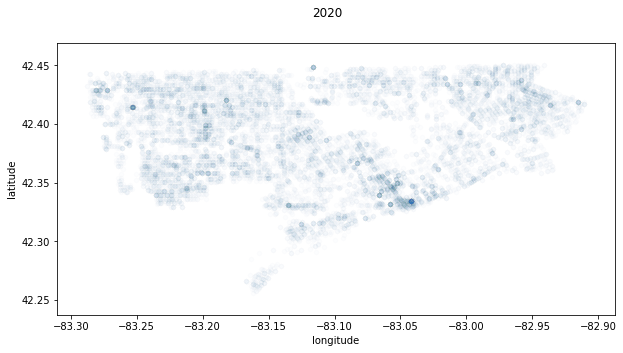

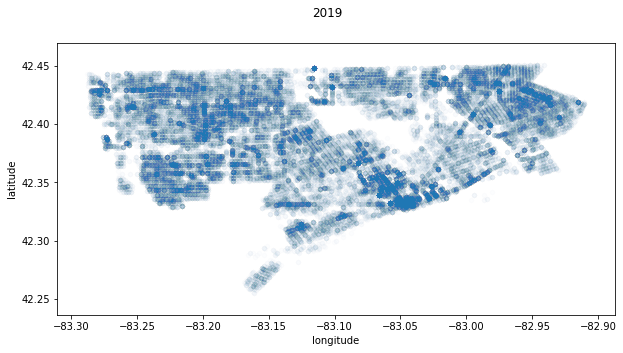

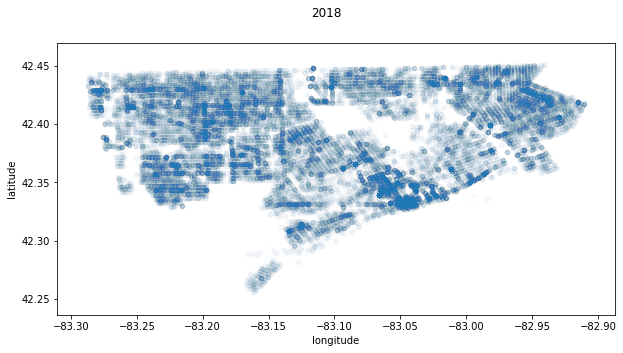

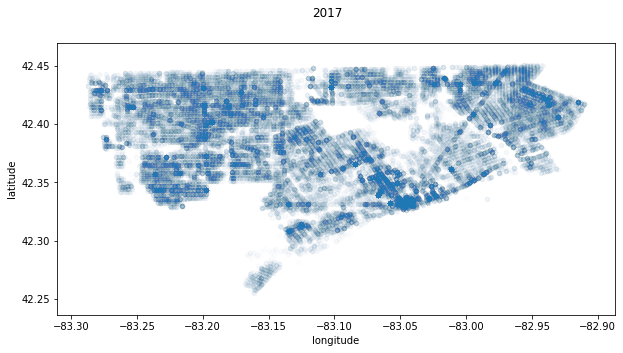

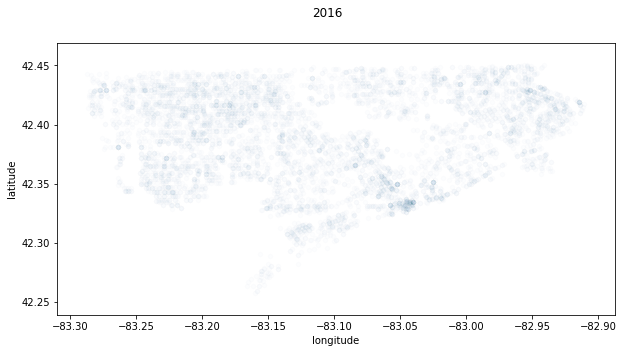

In [19]:
for indx, year in enumerate(sorted(df.year.unique(), reverse=True)):
    df[df.year == year].plot.scatter(x='longitude', y='latitude', figsize=(10, 5), alpha=0.011);
    plt.suptitle(year)
    plt.savefig(PATH_TO_IMAGES + 'scatters_{}.png'.format(year), dip=600)
#     break
plt.show()

***

# Density evaluation of reported crimes for "Inner cities" of Detroit
_Data is not provided but the problem is. Try to evaluate the offenses' amount of inner but non-accountable parts_

Historically, Both **Hamtramck and Highland Park** weren't the parts of Detroit, thus they don't related to the Detroit Police Departmentб its statistics and even its duty, so we haven't got a precise number of offenses from the two regions inside of a Detroit 

But we understand that these old borders do not stop the crimes.

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'figsize'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


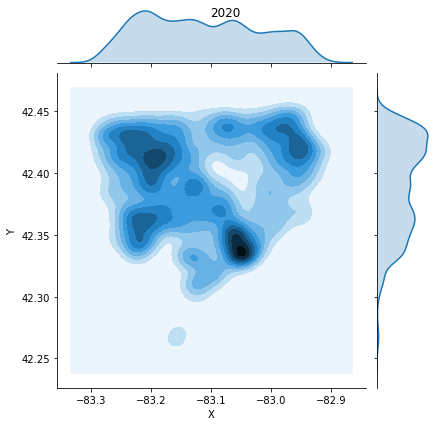

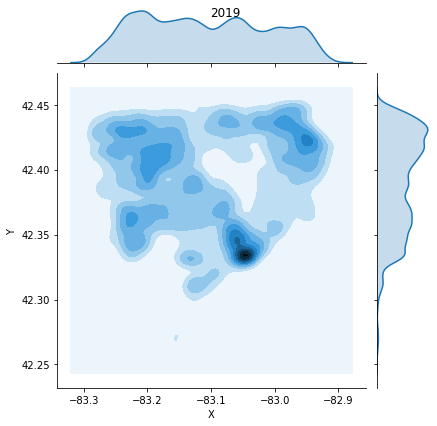

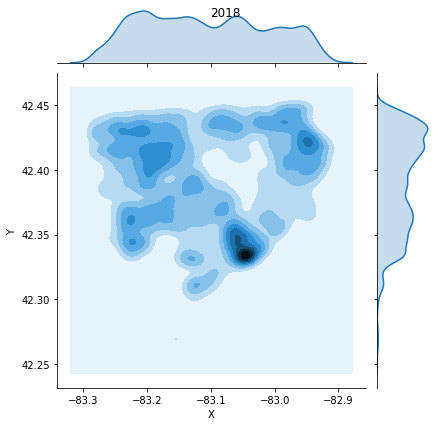

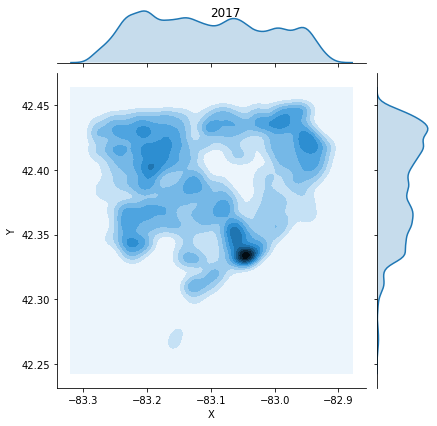

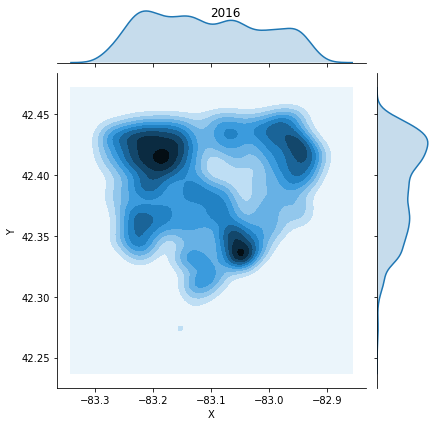

Wall time: 2min 34s


In [20]:
%%time
for indx, year in enumerate(sorted(df.year.unique(), reverse=True)):
    g = sns.jointplot(df[df.year == year]['X'], df[df.year == year]['Y'], kind='kde', figsize=(20, 20)) # aplha=0.005
    plt.suptitle(year);
    g.savefig(PATH_TO_IMAGES + 'density_evaluation_{}.png'.format(year), dip=600)
#     break
plt.show()

***

# Reported crimes by its category against
_There are several types of offenses_

Geolocation based density-distribution of offenses grouped by its meta-category from the National Incident-Based Reporting System:
* Against person
* Against society
* Against property

Wall time: 38.3 s


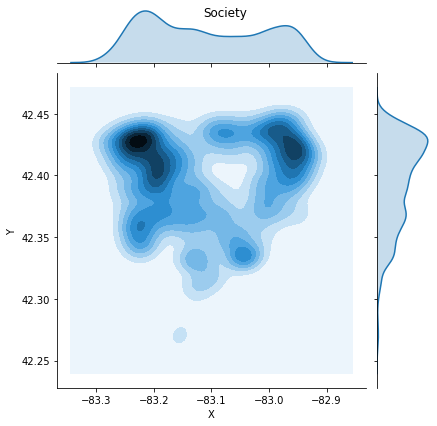

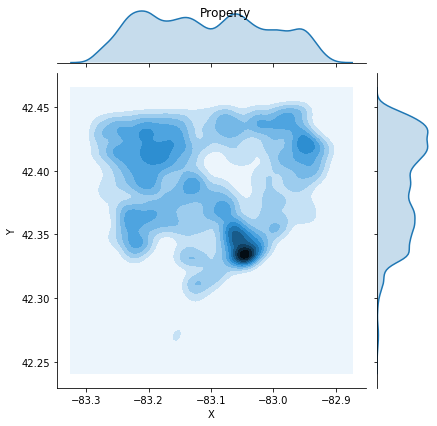

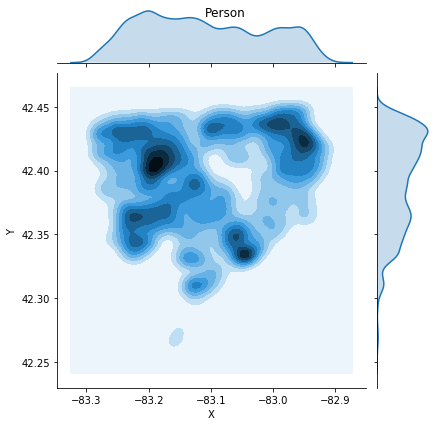

In [21]:
%%time
for cat_ag in sorted(df['Crime Against'].unique(), reverse=True)[0:3]:
    try: # becouse the probable oversize of points lets take a sample
        df_to_plot = df[df['Crime Against'] == cat_ag].sample(40000)
        sns.jointplot(df_to_plot[df_to_plot['Crime Against'] == cat_ag]['X'], 
                      df_to_plot[df_to_plot['Crime Against'] == cat_ag]['Y'], kind='kde',  
                      figsize=(20, 20))
    except:
        sns.jointplot(df[df['Crime Against'] == cat_ag]['X'], df[df['Crime Against'] == cat_ag]['Y'], kind='kde', 
                      figsize=(20, 20))
    plt.suptitle(cat_ag);
    plt.savefig(PATH_TO_IMAGES + 'by_category_{}.png'.format(cat_ag), dip=800) 

# Grand Rapids 'Near Calvin campus' data sample
_There are cities who also use and publish such data_

For instance, Grand Rapids, MI, publish data from 2017/2018 and do not give an opportunity to export it (Detroit have the data from 1934 and even have an API)

<img src="https://i.imgur.com/vwFiP12.jpg" alt="Grand Rapids crime map, current interface" height="30%" width="100%">